<a href="https://colab.research.google.com/github/MohammadAghaei1/Polynomial-Car-price-prediction-/blob/main/Mohammad/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Improting Dataset

In [40]:
!git clone https://github.com/MohammadAghaei1/Polynomial-Car-price-prediction-

fatal: destination path 'Polynomial-Car-price-prediction-' already exists and is not an empty directory.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [42]:
df = pd.read_csv('/content/Polynomial-Car-price-prediction-/Dataset/car_data_cleaned.csv')

In [43]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# **Preparing Dataset**

In [46]:
df.duplicated().sum()

np.int64(2)

In [47]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
display(duplicate_rows)

Duplicate Rows:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [48]:
df.drop_duplicates(inplace=True)

print("DataFrame after removing duplicates:")
display(df.duplicated().sum())

DataFrame after removing duplicates:


np.int64(0)

In [49]:
unique_car_names = df['Owner'].unique()
print(unique_car_names)

[0 1 3]


# **EDA**

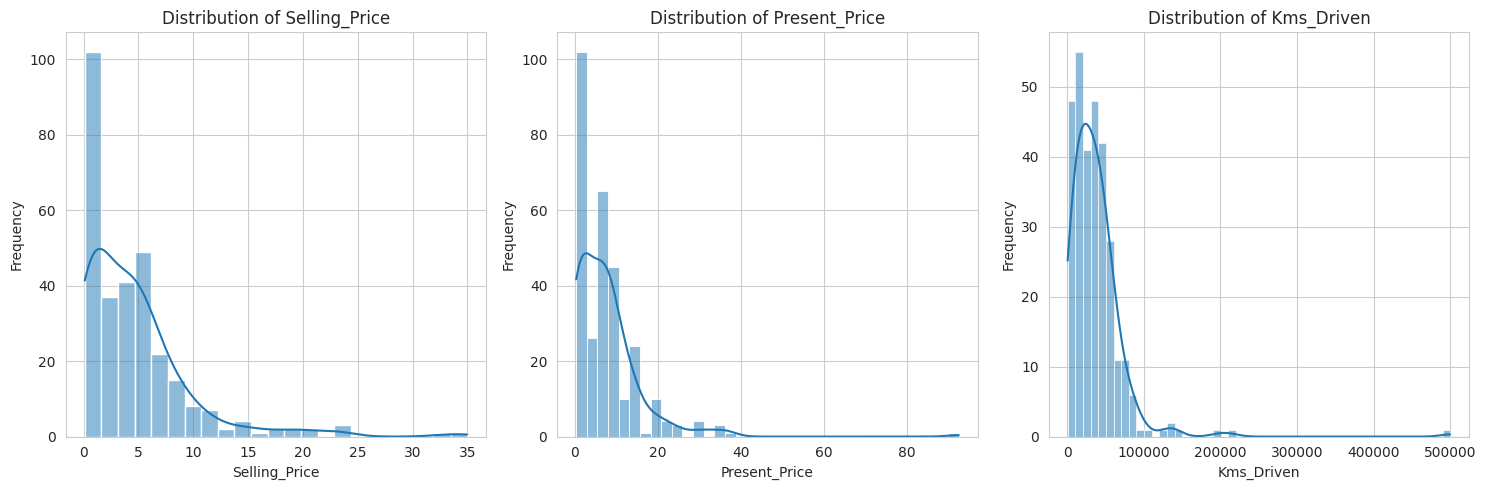

In [50]:
sns.set_style('whitegrid')

# Create histograms for the specified columns
columns_to_plot = ['Selling_Price', 'Present_Price', 'Kms_Driven']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3007922303.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-3007922303.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-3007922303.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-3007922303.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

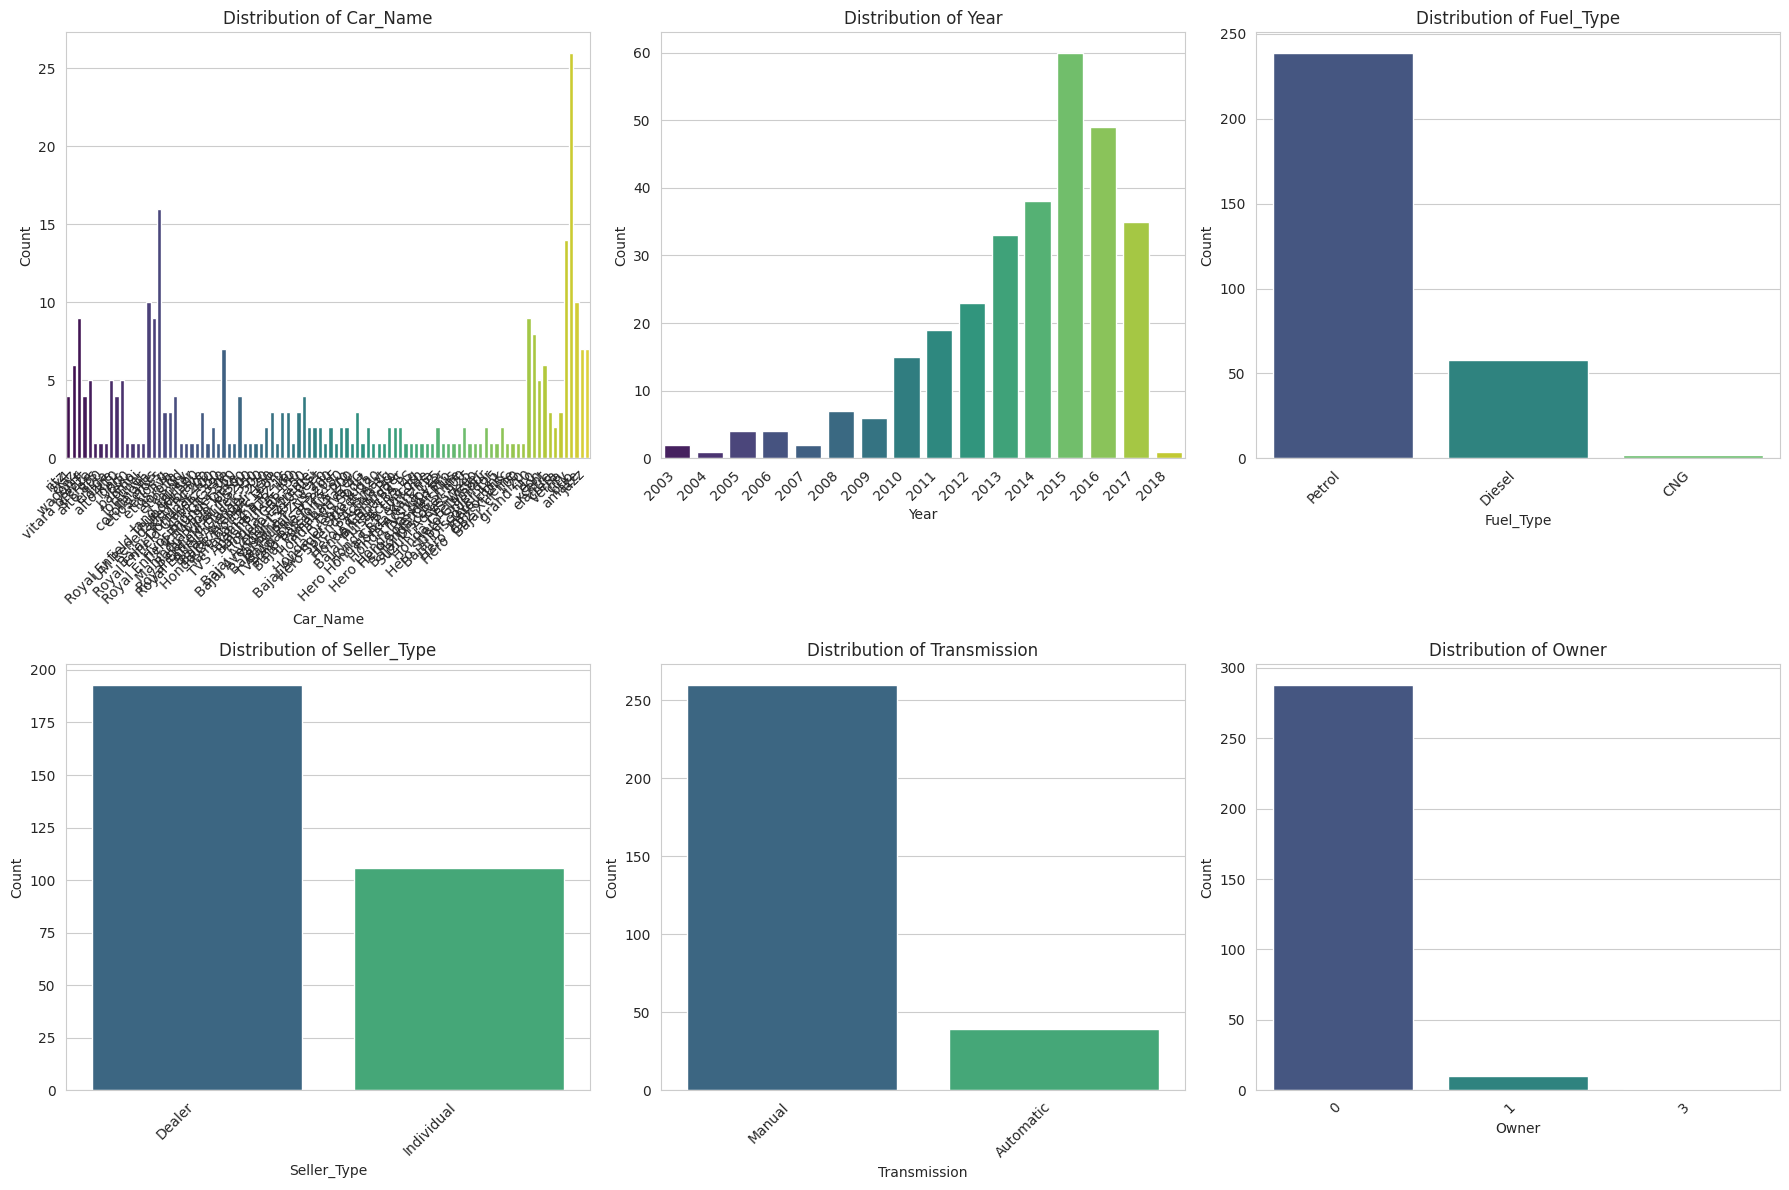

In [51]:
# Set the style for the plots
sns.set_style('whitegrid')

# Create bar plots for the specified categorical columns
categorical_columns = ['Car_Name','Year',  'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

plt.figure(figsize=(18, 12)) # Adjust figure size for multiple plots

for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1) # Arrange plots in a 2x3 grid
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [52]:
# Sort the DataFrame by 'Selling_Price' in descending order and get the top 5
most_expensive_cars = df.sort_values(by='Present_Price', ascending=False).head(5)

# Display the result
print("Top 5 Most Expensive Cars:")
display(most_expensive_cars)

Top 5 Most Expensive Cars:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0


In [53]:
# Sort the DataFrame by 'Selling_Price' in descending order and get the top 5
most_expensive_cars = df.sort_values(by='Selling_Price', ascending=False).head(5)

# Display the result
print("Top 5 Most Expensive Cars:")
display(most_expensive_cars)

Top 5 Most Expensive Cars:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0
82,innova,2017,23.0,25.39,15000,Diesel,Dealer,Automatic,0
51,fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0


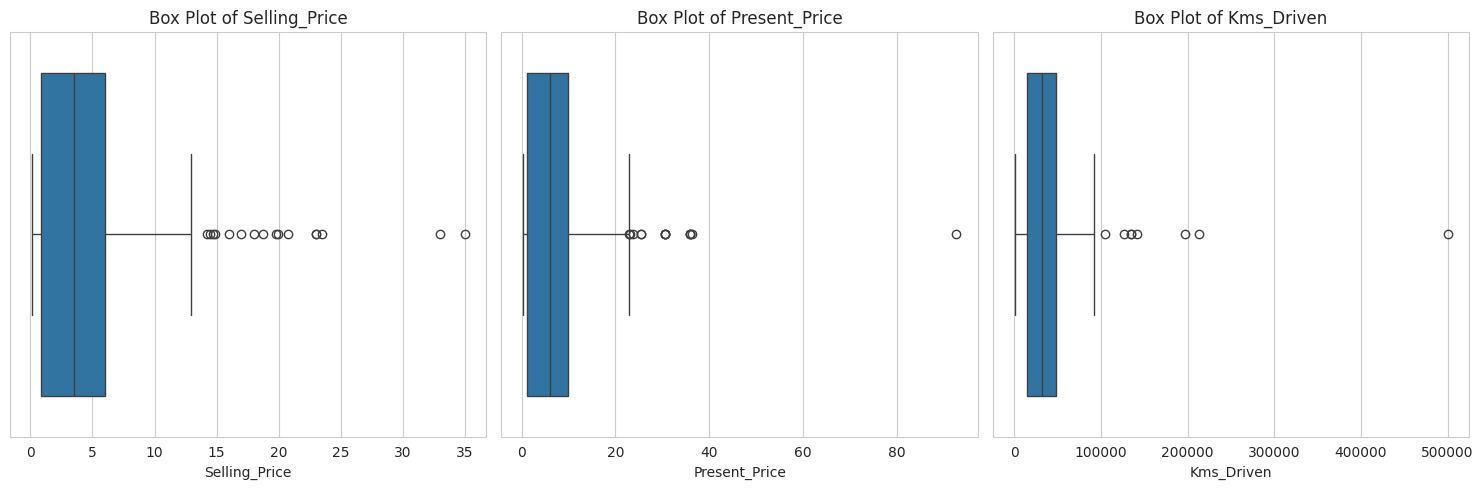

In [59]:
# Select numerical columns excluding 'Owner' and 'Year'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Owner', 'Year'])

# Create box plots for the selected numerical columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [60]:
# Sort the DataFrame by 'Kms_Driven' in descending order and get the top 5
cars_highest_kms = df.sort_values(by='Kms_Driven', ascending=False).head(5)

# Display the result
print("Top 5 Cars with Highest Kms Driven:")
display(cars_highest_kms)

Top 5 Cars with Highest Kms Driven:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0


/tmp/ipython-input-429311354.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cars.index, y=top_5_cars.values, palette='viridis')


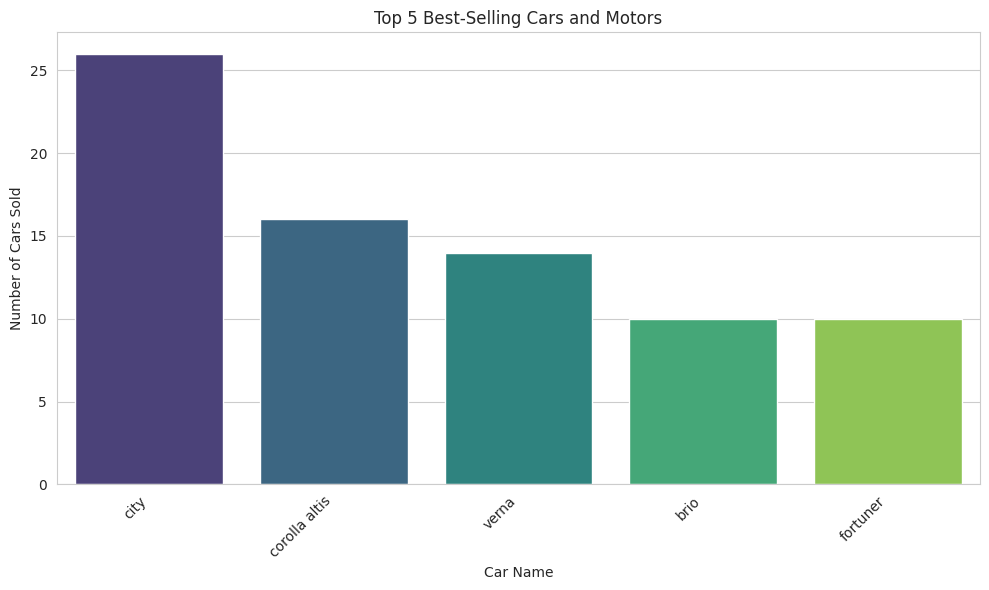

In [62]:
# Get the count of each car name and select the top 5
top_5_cars = df['Car_Name'].value_counts().head(5)

# Create a bar plot for the top 5 best-selling cars
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cars.index, y=top_5_cars.values, palette='viridis')
plt.title('Top 5 Best-Selling Cars and Motors')
plt.xlabel('Car Name')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

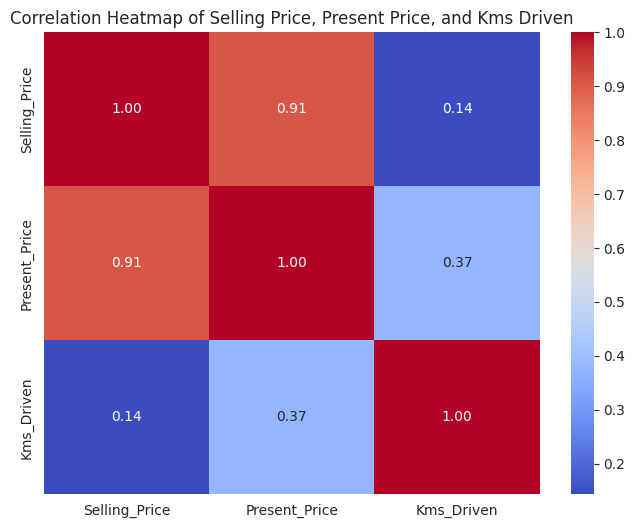

In [64]:
# Select the relevant columns
correlation_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven']
correlation_df = df[correlation_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr('spearman')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selling Price, Present Price, and Kms Driven')
plt.show()

In [65]:
# Group 'Selling_Price' by 'Year'
groups = [df['Selling_Price'][df['Year'] == year] for year in df['Year'].unique()]

# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*groups)

# Print the results
print(f"Kruskal-Wallis H-statistic: {h_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis.")
    print("There is a statistically significant difference in the median Selling_Price across different years.")
else:
    print("\nSince the p-value is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the median Selling_Price across different years.")

Kruskal-Wallis H-statistic: 42.0470
P-value: 0.0002

Since the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis.
There is a statistically significant difference in the median Selling_Price across different years.


In [70]:
# Group 'Selling_Price' by 'Fuel_Type'
groups = [df['Selling_Price'][df['Fuel_Type'] == fuel_type] for fuel_type in df['Fuel_Type'].unique()]

# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*groups)

# Print the results
print(f"Kruskal-Wallis H-statistic: {h_statistic:.4f}")
print(f"P-value: {p_value:.20f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis.")
    print("There is a statistically significant difference in the median Selling_Price across different Fuel_Type categories.")
else:
    print("\nSince the p-value is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the median Selling_Price across different Fuel_Type categories.")

Kruskal-Wallis H-statistic: 75.3944
P-value: 0.00000000000000004249

Since the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis.
There is a statistically significant difference in the median Selling_Price across different Fuel_Type categories.
